In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_bokeh
# pd.set_option('plotting.backend', 'pandas_bokeh')
pandas_bokeh.output_notebook()


Loading BokehJS ...

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv",parse_dates=['date'])
data.set_index('date', inplace=True)

In [48]:
plt.figure()
plt.rcParams.update({'font.size': 22}) # must set in top
plt.rcParams.update({'figure.figsize': (24,10)}) # must set in top
plt.rcParams["axes.formatter.limits"] = (-5, 12)

<Figure size 1728x720 with 0 Axes>

In [16]:
data.columns.size

67

In [25]:
interesting_colums = ["new_cases", "new_cases_smoothed", "new_cases_smoothed_per_million",
                      "new_deaths", "new_deaths_smoothed", "new_deaths_smoothed_per_million",
                      "total_cases_per_million","total_cases", "total_deaths","total_deaths_per_million", "mortality_rate"]

data['mortality_rate'] = data['total_deaths_per_million'] / \
    data['total_cases_per_million']

slovakia = data[data['iso_code'] == "SVK"][interesting_colums]


In [9]:
slovakia.columns

Index(['new_cases', 'new_cases_smoothed', 'new_cases_smoothed_per_million',
       'new_deaths_smoothed', 'new_deaths_smoothed',
       'new_deaths_smoothed_per_million', 'total_cases_per_million',
       'total_deaths_per_million', 'mortality_rate'],
      dtype='object')

In [18]:
slovakia['new_deaths'].sum()


19093.0

In [17]:
slovakia.tail()

,new_cases,new_cases_smoothed,new_cases_smoothed_per_million,new_deaths,new_deaths_smoothed,new_deaths_smoothed_per_million,total_cases_per_million,total_deaths_per_million,mortality_rate
date,,,,,,,,,
2022-03-15,12630.0,11197.571,2054.876,29.0,32.714,6.003,421226.513,3482.852,0.008268
2022-03-16,13652.0,11096.714,2036.367,30.0,31.857,5.846,423731.803,3488.357,0.008232
2022-03-17,13202.0,10886.000,1997.699,31.0,31.857,5.846,426154.512,3494.046,0.008199
2022-03-18,10931.0,10680.429,1959.974,33.0,32.286,5.925,428160.469,3500.102,0.008175
2022-03-19,10895.0,10635.286,1951.690,20.0,30.286,5.558,430159.820,3503.772,0.008145


<AxesSubplot:title={'center':'Slovensko - Počet prípadov ochorenia'}, xlabel='date'>

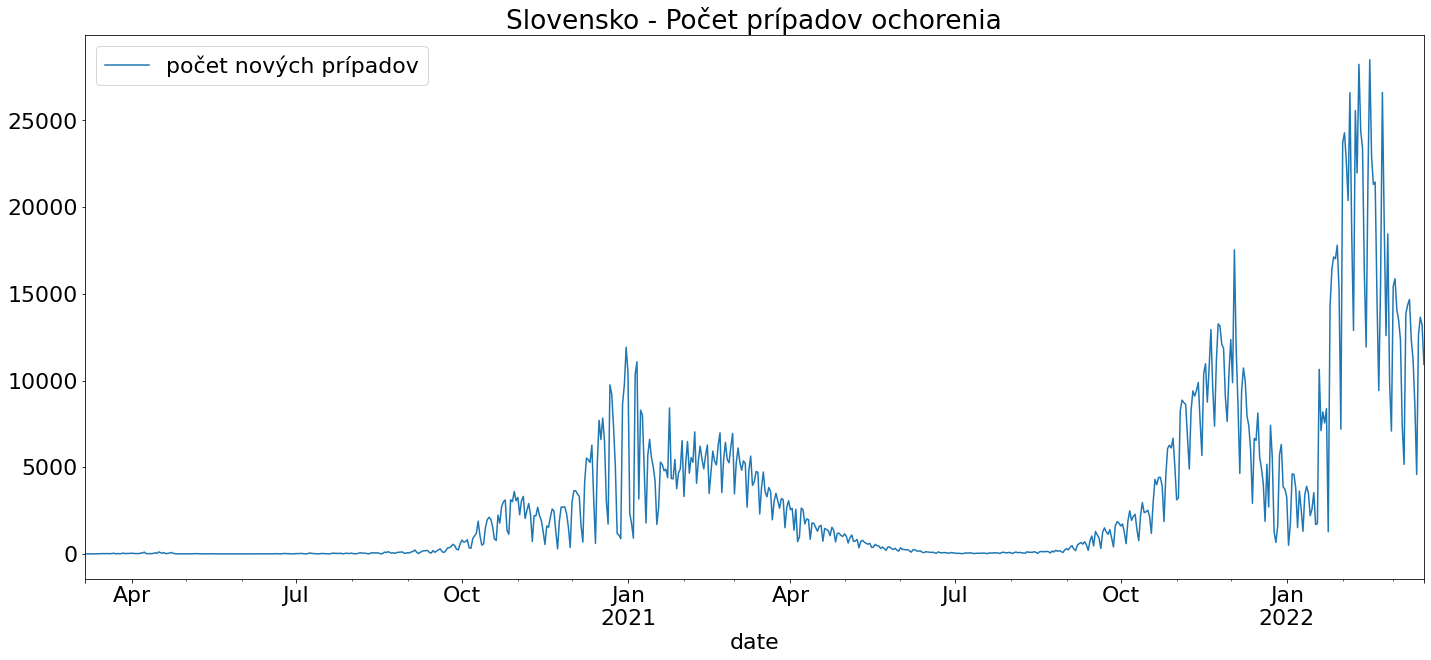

In [20]:
slovakia.plot(y=['new_cases'],
              title="Slovensko - Počet prípadov ochorenia",
              label=["počet nových prípadov"])


## Vrchol prvej vlny

In [103]:
slovakia[(slovakia.index >= '2020-1-1' ) & (slovakia.index <= '2020-05-01')]['new_cases_smoothed'].idxmax()

Timestamp('2020-04-19 00:00:00')

## Vyhladený graf s vyznačenými udalosťami

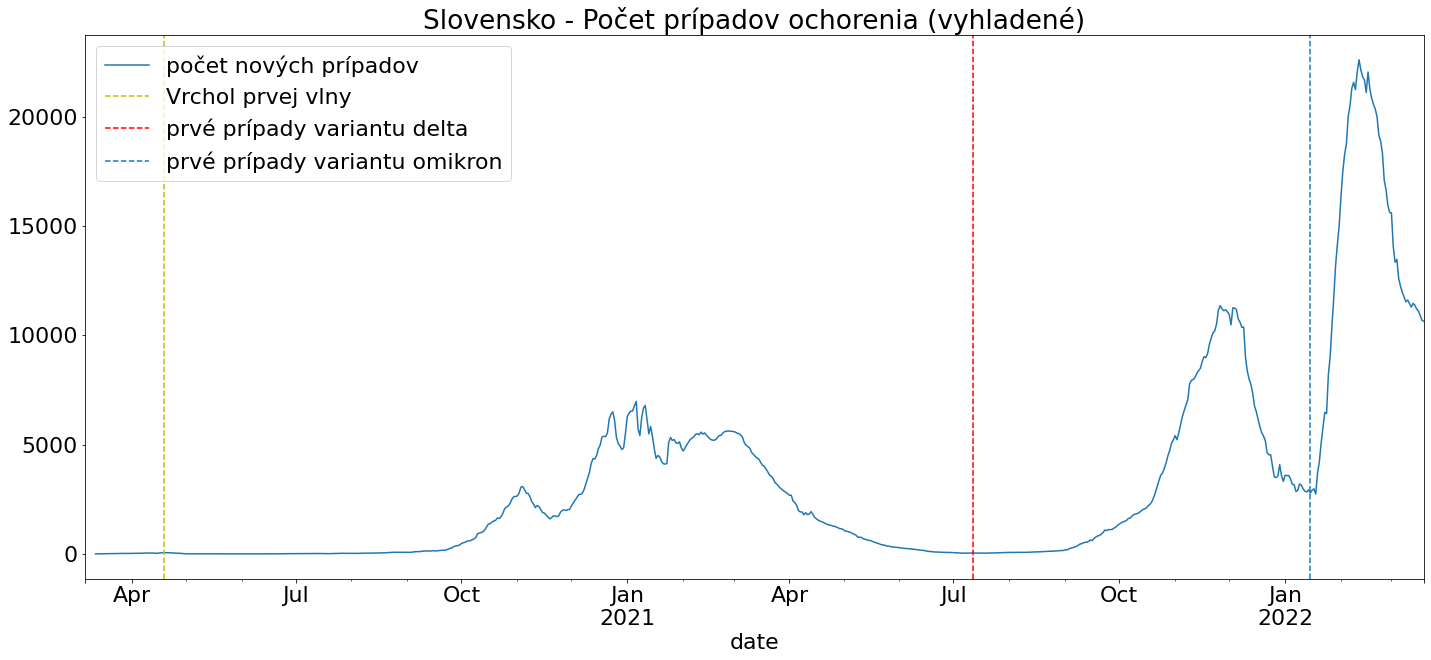

In [106]:
slovakia.plot(y=['new_cases_smoothed'],
              title="Slovensko - Počet prípadov ochorenia (vyhladené)",
              label=["počet nových prípadov"])

plt.axvline(pd.to_datetime('2020-04-19'), color='y', linestyle='--', label='Vrchol prvej vlny')
plt.axvline(pd.to_datetime('2021-07-12'), color='r', linestyle='--', label='prvé prípady variantu delta')
plt.axvline(pd.to_datetime('2022-01-15'), linestyle='--', label='prvé prípady variantu omikron')
plt.legend(loc='upper left')



<AxesSubplot:title={'center':'Slovensko - počet nových prípadov a celkových úmrtí'}, xlabel='date'>

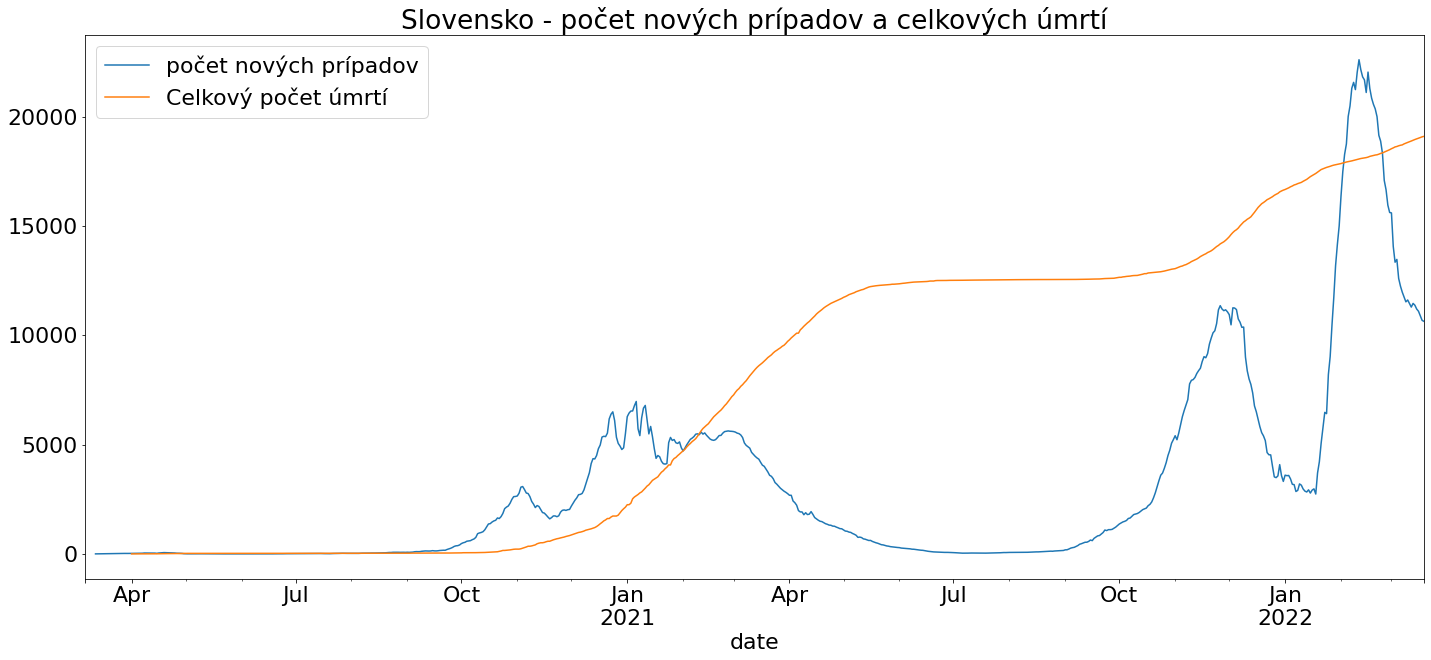

In [23]:
slovakia.plot(y=['new_cases_smoothed', 'total_deaths'],
              title="Slovensko - počet nových prípadov a celkových úmrtí",
              label=["počet nových prípadov", "Celkový počet úmrtí"], subplots=False)


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

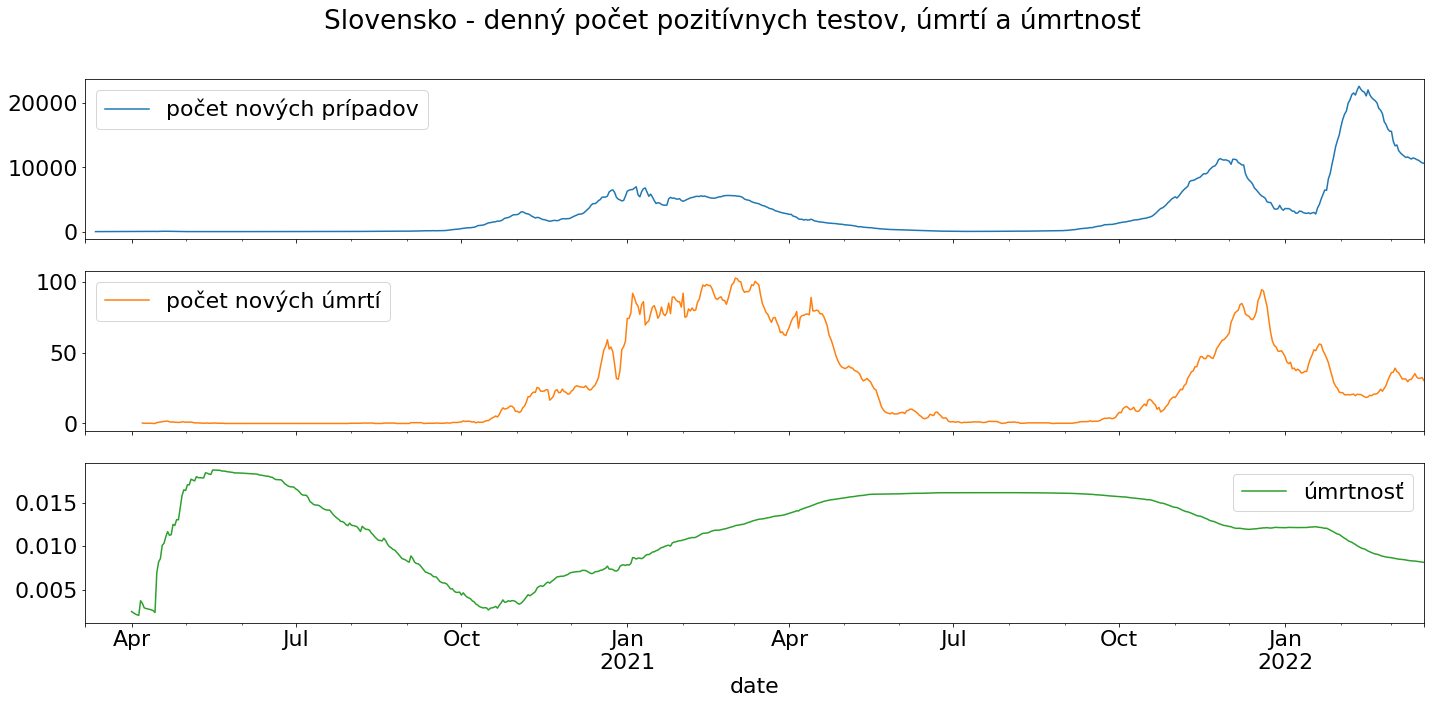

In [83]:
slovakia.plot(y=['new_cases_smoothed', 'new_deaths_smoothed', 'mortality_rate'],
              title="Slovensko - denný počet pozitívnych testov, úmrtí a úmrtnosť",
              label=["počet nových prípadov",
                     "počet nových úmrtí", 'úmrtnosť'],
              subplots=True)



<AxesSubplot:title={'center':'Slovensko - počet prípadov a úmrtí'}, xlabel='date'>

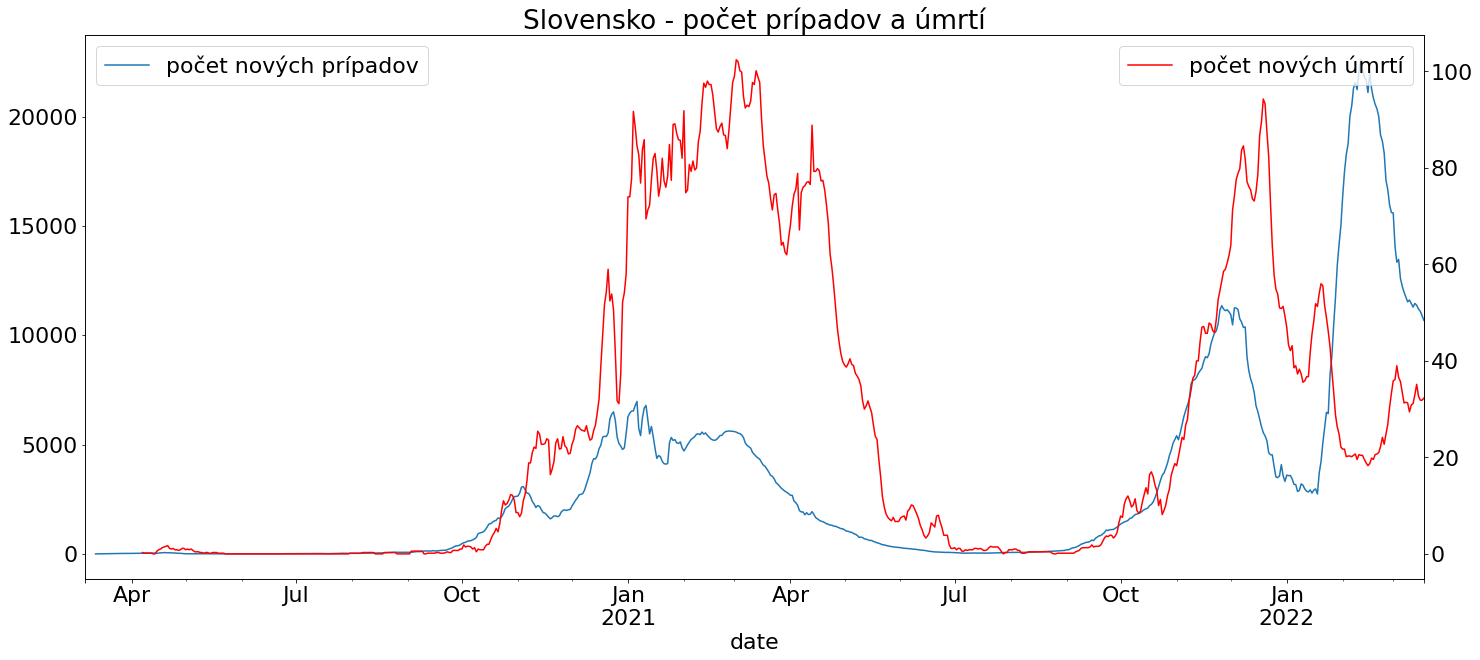

In [27]:
ax1 = slovakia.plot(y=['new_cases_smoothed'], label=["počet nových prípadov"])
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1))
slovakia.plot(y=['new_deaths_smoothed'], color="red", ax=ax2,
              title="Slovensko - počet prípadov a úmrtí", label=["počet nových úmrtí"])


## Maximálná úmrtnosť

In [ ]:
slovakia['mortality_rate'].max()

## Celková úmrtnosť

In [29]:

slovakia['total_deaths'].max() / slovakia['total_cases'].max()*100

0.8145279743623982

## Kumulatívny počet prípadov a úmrtnosť

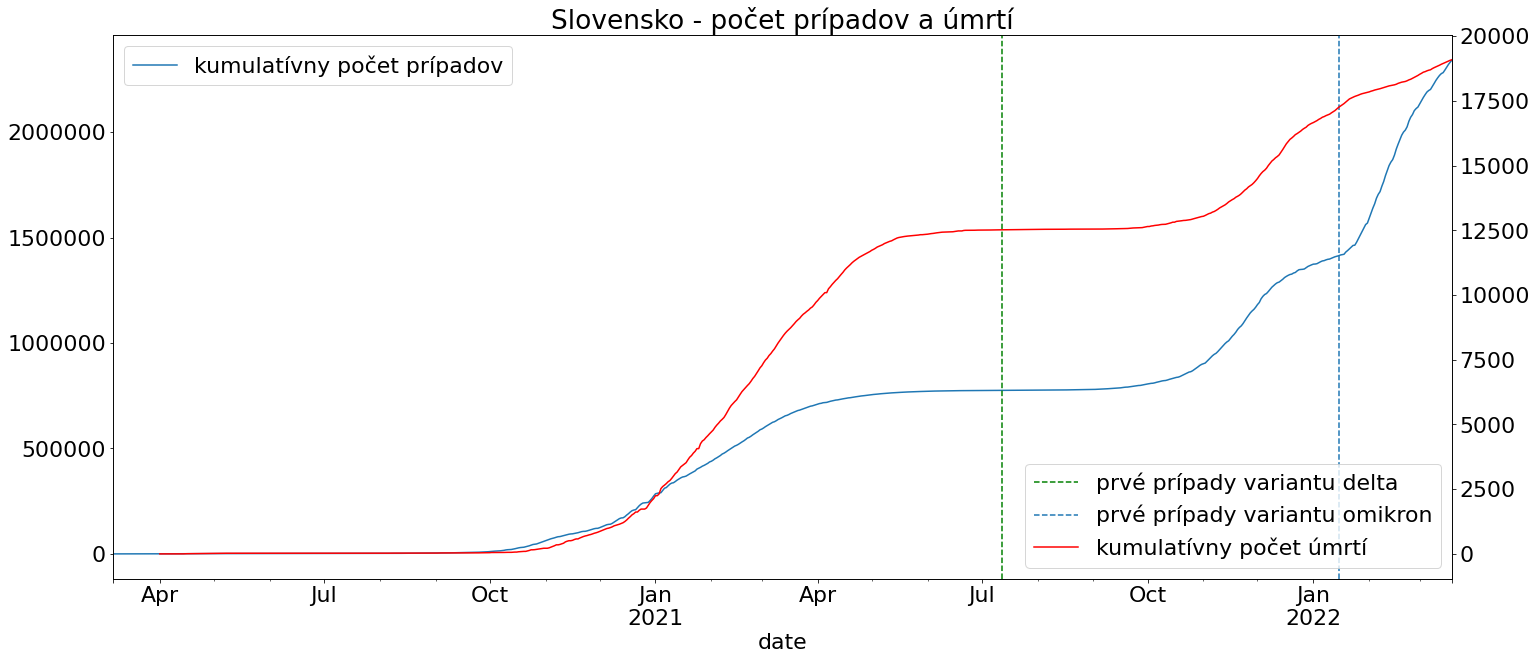

In [71]:
ax1 = slovakia.plot(y=['total_cases'], label=["kumulatívny počet prípadov"])
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1))
ax2.axvline(pd.to_datetime('2021-07-12'), color='g', linestyle='--', label='prvé prípady variantu delta')
ax2.axvline(pd.to_datetime('2022-01-15'), linestyle='--', label='prvé prípady variantu omikron')


slovakia.plot(y=['total_deaths'], color="red", ax=ax2,
              title="Slovensko - počet prípadov a úmrtí", 
              label=["kumulatívny počet úmrtí"],
              ).legend(loc='lower right')
